In [163]:
import sqlite3
from pandas.io.sql import read_sql
from sqlalchemy import create_engine
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Get files from directory:
import os
import timeit
#=============================================================
## -------- ADD PATH TO THE SQLITE FILE!!! ------------------
path = 'C:\\Users\\admin\\Desktop\\Capstone\\Final SQL\\SQL\\'

#for loop to go over all the databases
for filename in os.listdir(path):
    #=============================================================
    ## COMMENT TO PROCESS ALL THE DATABASES
    if filename=='clip_11.sqlite':
    #=============================================================
        con = sqlite3.connect(path+filename)
        
        #Defining The number of objects we have
        sql_command = "SELECT COUNT(*) FROM objects"

        max_objects_sql = con.execute(sql_command)
        max_objects = max_objects_sql.fetchone()
        max_objects=max_objects[0]

        ## Using the SQL command
        # Getting the positions of every object
        df_positions = pd.read_sql_query("SELECT a.object_id,  b.frame_number, x_coordinate, y_coordinate\
        FROM objects_features AS a \
        JOIN positions AS b ON a.trajectory_id = b.trajectory_id",con)

        # Getting the velocities of every object
        df_velocities = pd.read_sql_query("SELECT a.object_id,  b.frame_number, b.x_coordinate, b.y_coordinate\
        FROM objects_features AS a \
        JOIN velocities AS b ON a.trajectory_id = b.trajectory_id",con)


        # Merging the velocities and positions
        df = pd.DataFrame()

        df=df_positions.copy()
        df['v_x']=df_velocities['x_coordinate']
        df['v_y']=df_velocities['y_coordinate']
        df.columns = ['object', 'frame', 'x', 'y', 'v_x', 'v_y']
        
        
        #=============================================================
        # UNCOMMENT IF YOU WOULD LIKE TO COMPUTE THE AVERAGE OVER THE TRAJECTORIES
                
        #df=df.groupby(['object','frame']).mean().reset_index()
        
        #=============================================================

        
        #=============================================================
        ## UNCOMMENT TO PLOT
        for i in range(max_objects):
            
            X0=pd.Series.tolist((df.loc[df['object'] == i])['x'])
            Y0=pd.Series.tolist((df.loc[df['object'] == i])['y'])
            plt.scatter(X0,Y0)
            plt.xlabel("X positions")
            plt.ylabel("Y positions")
            plt.title("Trajectories of moving objects of"+ filename)
        #plt.show()
        #=============================================================
        
        ## --------------- Classification  --------------------------
                
        veh_id,ped_id=classify(max_objects,df_positions)
        
        
        #=============================================================
        ## UNCOMMENT TO SEE THE VEHICLES AND PEDESTRIANS ID
        
        print veh_id,ped_id
        
        #============================================================= 
        
        #pairing = {'veh_id': veh_id, 'ped_id': ped_id}
        #df_pairing = pd.DataFrame(data=pairing)
        #df_pairing.to_pickle('obj_ID')
        


[18] [22]


In [156]:
def classify(max_objects, df_positions):
    veh_id=[]
    ped_id=[]
    for i in range(max_objects):
        temp=df_positions.loc[df_positions['object_id'] == i].reset_index(drop=True)
        

        x_diff = (temp['x_coordinate'][temp.shape[0]-1]-temp['x_coordinate'][0])
        y_diff = (temp['y_coordinate'][temp.shape[0]-1]-temp['y_coordinate'][0])

    #If you want to print the differences for every object, uncomment the two lines below    
    # =============================================================================
    #     print('Diff in X for '+ str(i) + ' is ' +str(x_diff))
    #     print('Diff in Y for '+ str(i) + ' is ' +str(y_diff))
    #     print('\n\n')
    # =============================================================================


        if abs(x_diff) > 13:
            veh_id.append(i)
        elif abs(y_diff) > 2:
            ped_id.append(i)
        
    return veh_id, ped_id

x,y=classify(max_objects, df_positions)
print x,y

[] [29, 30, 36]


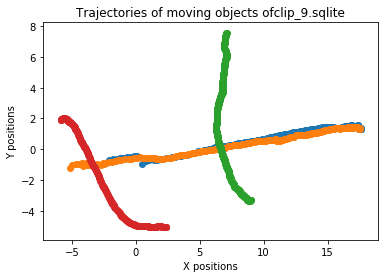

In [70]:
for i in veh_id:
    X0=pd.Series.tolist((df.loc[df['object'] == i])['x'])
    Y0=pd.Series.tolist((df.loc[df['object'] == i])['y'])
    plt.scatter(X0,Y0)
    plt.xlabel("X positions")
    plt.ylabel("Y positions")
    plt.title("Trajectories of moving objects of"+ filename)
for i in ped_id:
    X0=pd.Series.tolist((df.loc[df['object'] == i])['x'])
    Y0=pd.Series.tolist((df.loc[df['object'] == i])['y'])
    plt.scatter(X0,Y0)
    plt.xlabel("X positions")
    plt.ylabel("Y positions")
    plt.title("Trajectories of moving objects of"+ filename)
plt.show()


ped 10
veh 11


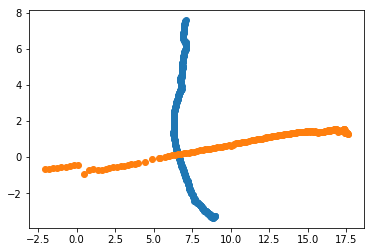

ped 15
veh 11


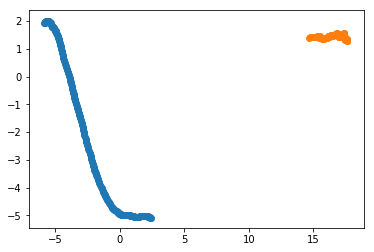

ped 10
veh 17


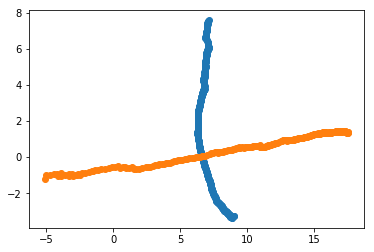

ped 15
veh 17


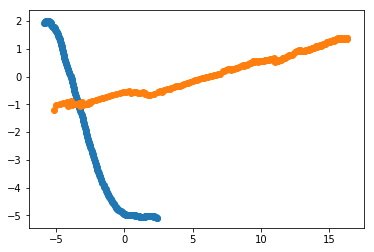

In [74]:
for i in veh_id:
    for j in ped_id:
        print 'ped', j
        print 'veh', i
        #We extract the ped and veh
        veh=df.loc[df['object'] == j]
        ped=df.loc[df['object'] == i]
        #print veh
        #print ped


        ## Left as the how because we take the pedestrian as a base
        interaction=pd.merge(veh, ped, how='left', on=['frame'])
        interaction.columns = ['object1', 'frame', 'x1', 'y1', 'v_x1', 'v_y1','object2', 'x2', 'y2', 'v_x2', 'v_y2']
        #print interaction

        #We get the interaction ! Let's plot it now
        X=pd.Series.tolist((interaction)['x1'])
        Y=pd.Series.tolist((interaction)['y1'])
        X2=pd.Series.tolist((interaction)['x2'])
        Y2=pd.Series.tolist((interaction)['y2'])
        plt.scatter(X,Y)
        plt.scatter(X2,Y2)
        plt.show()
